In [96]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import pickle
from scipy import optimize
import sklearn.metrics as metrics

In [97]:
res1_l_09 = pickle.load(open("result_09/light/res1.pickle", 'rb'))
res2_l_09 = pickle.load(open("result_09/light/res2.pickle", 'rb'))
res3_l_09 = pickle.load(open("result_09/light/res3.pickle", 'rb'))
res15_l_09 = pickle.load(open("result_09/light/res15.pickle", 'rb'))
res25_l_09 = pickle.load(open("result_09/light/res25.pickle", 'rb'))

res1_d_09 = pickle.load(open("result_09/dark/res1.pickle", 'rb'))
res2_d_09 = pickle.load(open("result_09/dark/res2.pickle", 'rb'))
res3_d_09 = pickle.load(open("result_09/dark/res3.pickle", 'rb'))
res15_d_09 = pickle.load(open("result_09/dark/res15.pickle", 'rb'))
res25_d_09 = pickle.load(open("result_09/dark/res25.pickle", 'rb'))

r_ur_ut_in_1_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_1.pickle", 'rb'))
r_ur_ut_in_2_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_2.pickle", 'rb'))
r_ur_ut_in_3_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_3.pickle", 'rb'))
r_ur_ut_in_15_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_15.pickle", 'rb'))
r_ur_ut_in_25_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_25.pickle", 'rb'))

r_ur_ut_in_1_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_1.pickle", 'rb'))
r_ur_ut_in_2_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_2.pickle", 'rb'))
r_ur_ut_in_3_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_3.pickle", 'rb'))
r_ur_ut_in_15_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_15.pickle", 'rb'))
r_ur_ut_in_25_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_25.pickle", 'rb'))

r_ur_urErr_1_l_09 = pickle.load(open("result_09/light/r_ur_urErr_1.pickle", 'rb'))
r_ur_urErr_2_l_09 = pickle.load(open("result_09/light/r_ur_urErr_2.pickle", 'rb'))
r_ur_urErr_3_l_09 = pickle.load(open("result_09/light/r_ur_urErr_3.pickle", 'rb'))
r_ur_urErr_15_l_09 = pickle.load(open("result_09/light/r_ur_urErr_15.pickle", 'rb'))
r_ur_urErr_25_l_09 = pickle.load(open("result_09/light/r_ur_urErr_25.pickle", 'rb'))

r_ur_urErr_1_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_1.pickle", 'rb'))
r_ur_urErr_2_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_2.pickle", 'rb'))
r_ur_urErr_3_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_3.pickle", 'rb'))
r_ur_urErr_15_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_15.pickle", 'rb'))
r_ur_urErr_25_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_25.pickle", 'rb'))

r_ut_utErr_1_l_09 = pickle.load(open("result_09/light/r_ut_utErr_1.pickle", 'rb'))
r_ut_utErr_2_l_09 = pickle.load(open("result_09/light/r_ut_utErr_2.pickle", 'rb'))
r_ut_utErr_3_l_09 = pickle.load(open("result_09/light/r_ut_utErr_3.pickle", 'rb'))
r_ut_utErr_15_l_09 = pickle.load(open("result_09/light/r_ut_utErr_15.pickle", 'rb'))
r_ut_utErr_25_l_09 = pickle.load(open("result_09/light/r_ut_utErr_25.pickle", 'rb'))

r_ut_utErr_1_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_1.pickle", 'rb'))
r_ut_utErr_2_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_2.pickle", 'rb'))
r_ut_utErr_3_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_3.pickle", 'rb'))
r_ut_utErr_15_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_15.pickle", 'rb'))
r_ut_utErr_25_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_25.pickle", 'rb'))

In [98]:
def fit_exp(params, x, y):
    return y - (params[0] * np.exp(params[1] * x))

def func_exp(params, x):
    return params[0] * np.exp(params[1] * x)

def fit_linear(params, x, y):
    return y - (params[0] * x)

def func_linear(params, x):
    return params[0] * x

In [99]:
r = np.linspace(0, 350, 351)

In [100]:
r_ur_urErr_1_d_09[:, 0] = r_ur_urErr_1_d_09[:, 0]/10
r_ur_urErr_1_l_09[:, 0] = r_ur_urErr_1_l_09[:, 0]/10
r_ur_urErr_15_d_09[:, 0] = r_ur_urErr_15_d_09[:, 0]/10
r_ur_urErr_15_l_09[:, 0] = r_ur_urErr_15_l_09[:, 0]/10
r_ur_urErr_2_d_09[:, 0] = r_ur_urErr_2_d_09[:, 0]/10
r_ur_urErr_2_l_09[:, 0] = r_ur_urErr_2_l_09[:, 0]/10
r_ur_urErr_25_d_09[:, 0] = r_ur_urErr_25_d_09[:, 0]/10
r_ur_urErr_25_l_09[:, 0] = r_ur_urErr_25_l_09[:, 0]/10
r_ur_urErr_3_d_09[:, 0] = r_ur_urErr_3_d_09[:, 0]/10
r_ur_urErr_3_l_09[:, 0] = r_ur_urErr_3_l_09[:, 0]/10

3.651457294079721 0.7757950823069595
297.2085231640172 -0.010916513517494267 0.9752942287634742


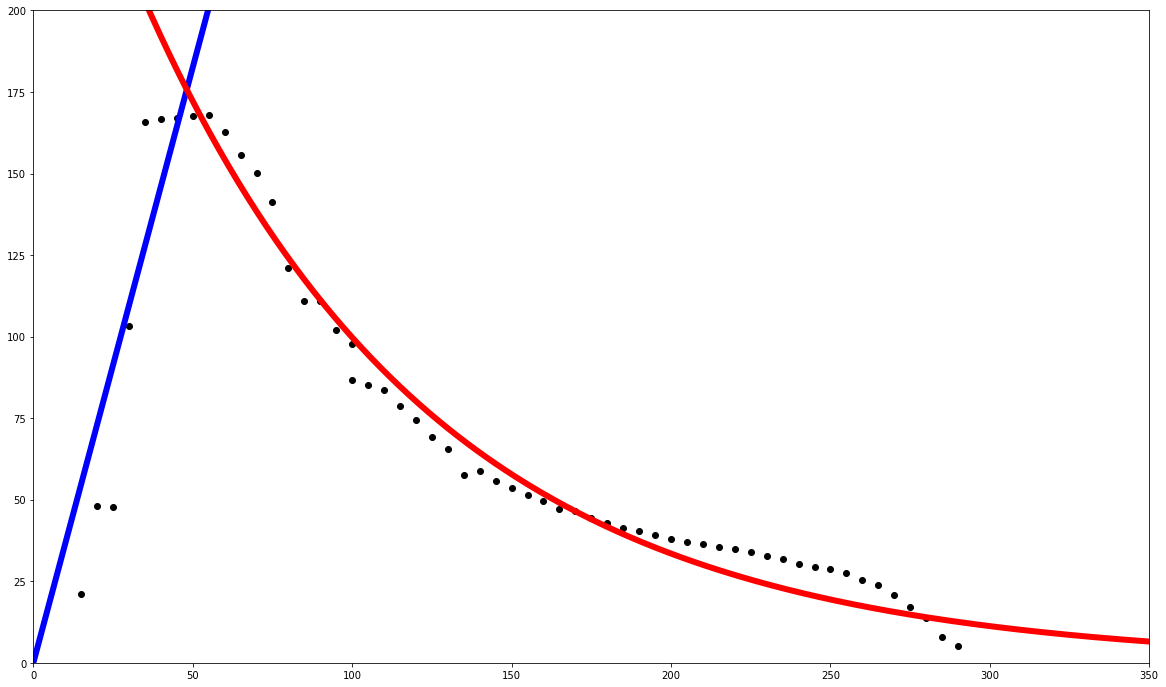

In [101]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.xlim(0, 350)
plt.ylim(0, 200)

ax.scatter(r_ur_urErr_1_d_09[:, 0], r_ur_urErr_1_d_09[:, 1], color='k')
ax.scatter(r_ur_urErr_1_l_09[:, 0], r_ur_urErr_1_l_09[:, 1], color='k')

result_linear = optimize.leastsq(fit_linear, np.array([9.]), args=(r_ur_urErr_1_d_09[:, 0][::50][3:10], r_ur_urErr_1_d_09[:, 1][::50][3:10]))
result_exp = optimize.leastsq(fit_exp, np.array([9., 0.]), args=(np.append(r_ur_urErr_1_d_09[:, 0][::50][10:20], r_ur_urErr_1_l_09[:, 0][::50][20:51]), np.append(r_ur_urErr_1_d_09[:, 1][::50][10:20], r_ur_urErr_1_l_09[:, 1][::50][20:51])))

r2_linear = metrics.r2_score(r_ur_urErr_1_d_09[:, 1][::50][3:10], func_linear(result_linear[0], r_ur_urErr_1_d_09[:, 0][::50][3:10]))
r2_exp = metrics.r2_score(np.append(r_ur_urErr_1_d_09[:, 1][::50][10:20], r_ur_urErr_1_l_09[:, 1][::50][20:51]), func_exp(result_exp[0], np.append(r_ur_urErr_1_d_09[:, 0][::50][10:20], r_ur_urErr_1_l_09[:, 0][::50][20:51])))

print(result_linear[0][0], r2_linear)
print(result_exp[0][0], result_exp[0][1], r2_exp)

ax.plot(r, func_linear(result_linear[0], r), linewidth=6, c='b')
ax.plot(r, func_exp(result_exp[0], r), linewidth=6, c='r')

plt.show()

3.584537221810113 0.6975621757091213
320.99493697147204 -0.009732001494027526 0.9710416779069936


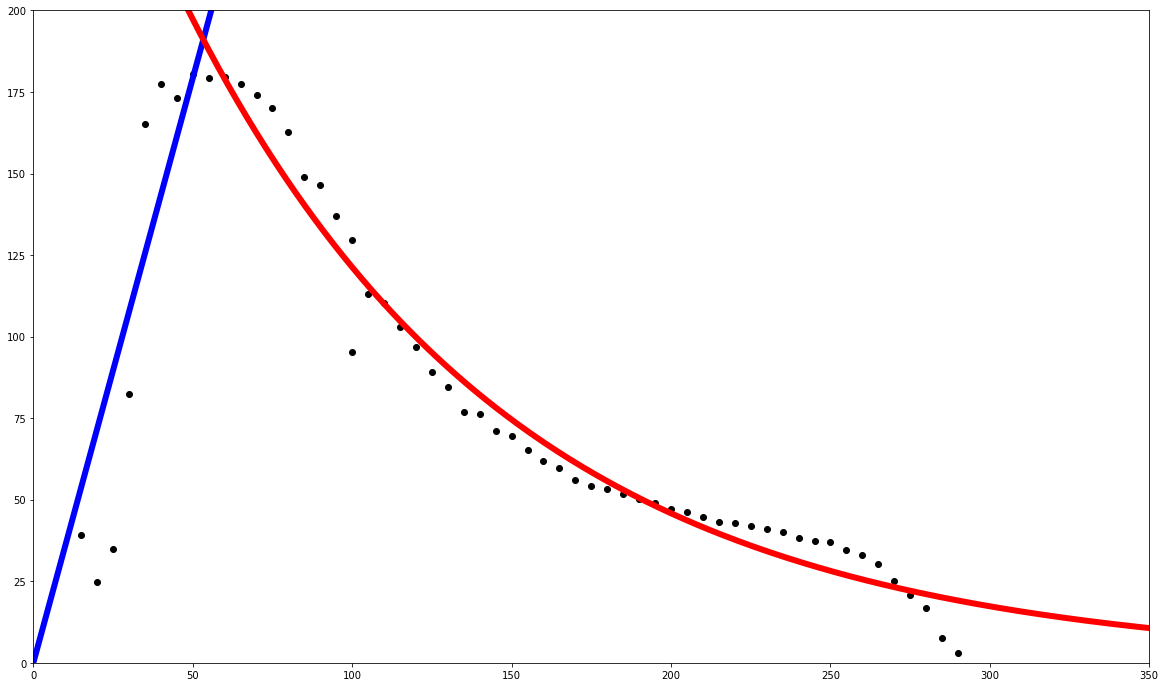

In [102]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.xlim(0, 350)
plt.ylim(0, 200)

ax.scatter(r_ur_urErr_15_d_09[:, 0], r_ur_urErr_15_d_09[:, 1], color='k')
ax.scatter(r_ur_urErr_15_l_09[:, 0], r_ur_urErr_15_l_09[:, 1], color='k')

result_linear = optimize.leastsq(fit_linear, np.array([9.]), args=(r_ur_urErr_15_d_09[:, 0][::50][3:10], r_ur_urErr_15_d_09[:, 1][::50][3:10]))
result_exp = optimize.leastsq(fit_exp, np.array([9., 0.]), args=(np.append(r_ur_urErr_15_d_09[:, 0][::50][10:20], r_ur_urErr_15_l_09[:, 0][::50][20:51]), np.append(r_ur_urErr_15_d_09[:, 1][::50][10:20], r_ur_urErr_15_l_09[:, 1][::50][20:51])))

r2_linear = metrics.r2_score(r_ur_urErr_15_d_09[:, 1][::50][3:10], func_linear(result_linear[0], r_ur_urErr_1_d_09[:, 0][::50][3:10]))
r2_exp = metrics.r2_score(np.append(r_ur_urErr_15_d_09[:, 1][::50][10:20], r_ur_urErr_15_l_09[:, 1][::50][20:51]), func_exp(result_exp[0], np.append(r_ur_urErr_15_d_09[:, 0][::50][10:20], r_ur_urErr_15_l_09[:, 0][::50][20:51])))

print(result_linear[0][0], r2_linear)
print(result_exp[0][0], result_exp[0][1], r2_exp)

ax.plot(r, func_linear(result_linear[0], r), linewidth=6, c='b')
ax.plot(r, func_exp(result_exp[0], r), linewidth=6, c='r')

plt.show()

3.6938131040820936 0.5221196625317628
304.10502690882515 -0.008235434093105216 0.974399216387435


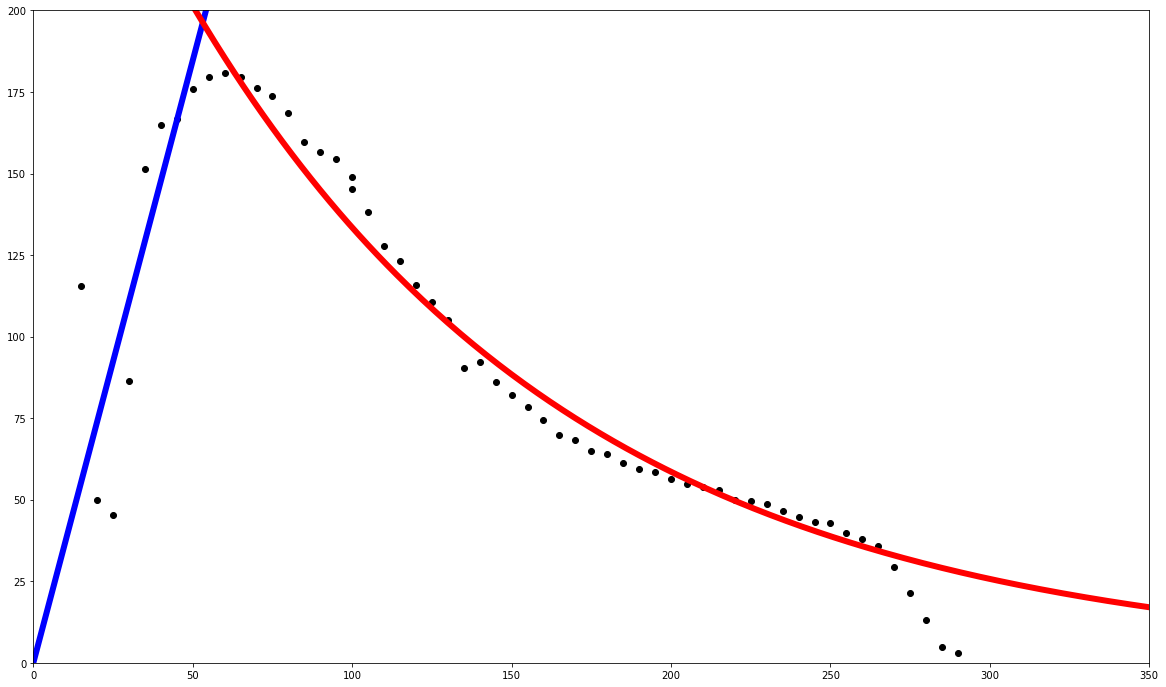

In [103]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.xlim(0, 350)
plt.ylim(0, 200)

ax.scatter(r_ur_urErr_2_d_09[:, 0], r_ur_urErr_2_d_09[:, 1], color='k')
ax.scatter(r_ur_urErr_2_l_09[:, 0], r_ur_urErr_2_l_09[:, 1], color='k')

result_linear = optimize.leastsq(fit_linear, np.array([9.]), args=(r_ur_urErr_2_d_09[:, 0][::50][3:10], r_ur_urErr_2_d_09[:, 1][::50][3:10]))
result_exp = optimize.leastsq(fit_exp, np.array([9., 0.]), args=(np.append(r_ur_urErr_2_d_09[:, 0][::50][10:20], r_ur_urErr_2_l_09[:, 0][::50][20:51]), np.append(r_ur_urErr_2_d_09[:, 1][::50][10:20], r_ur_urErr_2_l_09[:, 1][::50][20:51])))

r2_linear = metrics.r2_score(r_ur_urErr_2_d_09[:, 1][::50][3:10], func_linear(result_linear[0], r_ur_urErr_2_d_09[:, 0][::50][3:10]))
r2_exp = metrics.r2_score(np.append(r_ur_urErr_2_d_09[:, 1][::50][10:20], r_ur_urErr_2_l_09[:, 1][::50][20:51]), func_exp(result_exp[0], np.append(r_ur_urErr_2_d_09[:, 0][::50][10:20], r_ur_urErr_2_l_09[:, 0][::50][20:51])))

print(result_linear[0][0], r2_linear)
print(result_exp[0][0], result_exp[0][1], r2_exp)

ax.plot(r, func_linear(result_linear[0], r), linewidth=6, c='b')
ax.plot(r, func_exp(result_exp[0], r), linewidth=6, c='r')

plt.show()

2.381518999189632 0.7510985277582364
291.55305142597416 -0.007358043437038975 0.9581197465444948


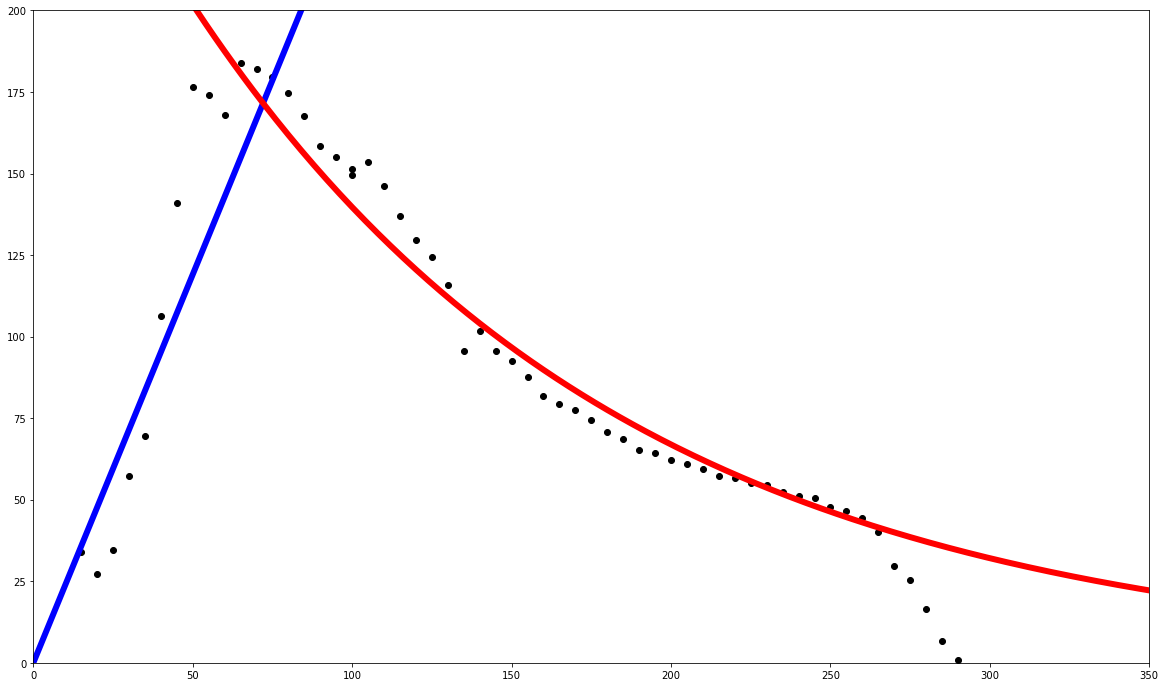

In [104]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.xlim(0, 350)
plt.ylim(0, 200)

ax.scatter(r_ur_urErr_25_d_09[:, 0], r_ur_urErr_25_d_09[:, 1], color='k')
ax.scatter(r_ur_urErr_25_l_09[:, 0], r_ur_urErr_25_l_09[:, 1], color='k')

result_linear = optimize.leastsq(fit_linear, np.array([9.]), args=(r_ur_urErr_25_d_09[:, 0][::50][3:10], r_ur_urErr_25_d_09[:, 1][::50][3:10]))
result_exp = optimize.leastsq(fit_exp, np.array([9., 0.]), args=(np.append(r_ur_urErr_25_d_09[:, 0][::50][10:20], r_ur_urErr_25_l_09[:, 0][::50][20:51]), np.append(r_ur_urErr_25_d_09[:, 1][::50][10:20], r_ur_urErr_25_l_09[:, 1][::50][20:51])))

r2_linear = metrics.r2_score(r_ur_urErr_25_d_09[:, 1][::50][3:10], func_linear(result_linear[0], r_ur_urErr_25_d_09[:, 0][::50][3:10]))
r2_exp = metrics.r2_score(np.append(r_ur_urErr_25_d_09[:, 1][::50][10:20], r_ur_urErr_25_l_09[:, 1][::50][20:51]), func_exp(result_exp[0], np.append(r_ur_urErr_25_d_09[:, 0][::50][10:20], r_ur_urErr_25_l_09[:, 0][::50][20:51])))

print(result_linear[0][0], r2_linear)
print(result_exp[0][0], result_exp[0][1], r2_exp)

ax.plot(r, func_linear(result_linear[0], r), linewidth=6, c='b')
ax.plot(r, func_exp(result_exp[0], r), linewidth=6, c='r')

plt.show()

2.9527233123721945 0.7321884862473538
298.50374052375736 -0.007600281124918739 0.9704209620474125


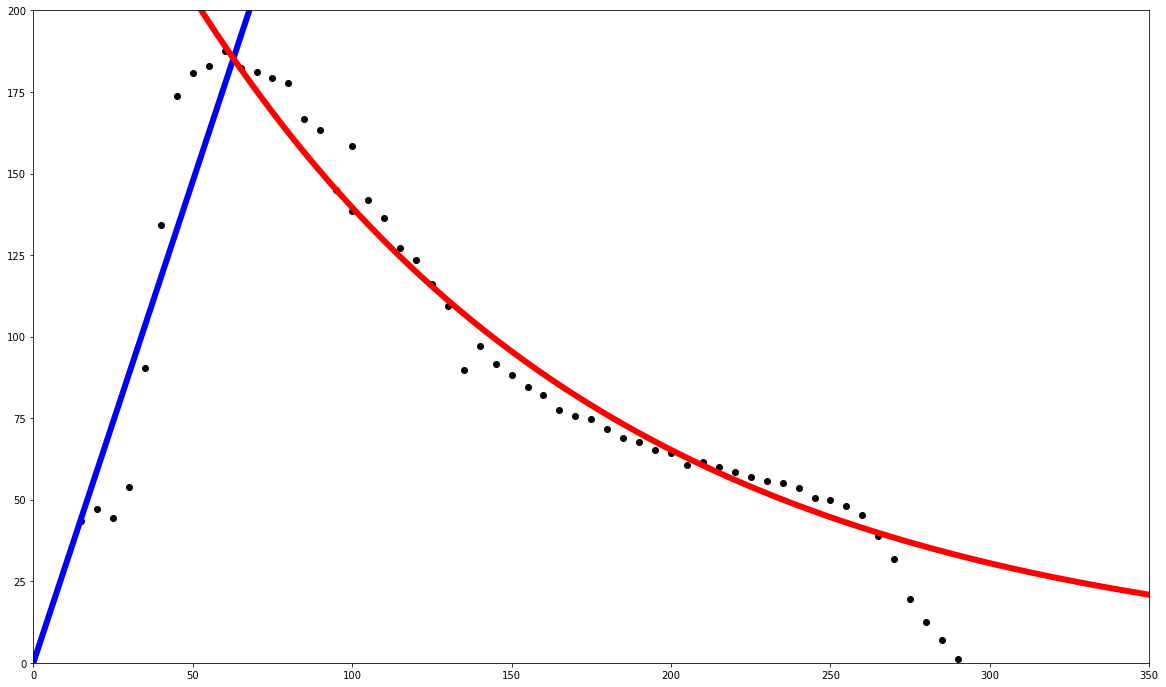

In [105]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.xlim(0, 350)
plt.ylim(0, 200)

ax.scatter(r_ur_urErr_3_d_09[:, 0], r_ur_urErr_3_d_09[:, 1], color='k')
ax.scatter(r_ur_urErr_3_l_09[:, 0], r_ur_urErr_3_l_09[:, 1], color='k')

result_linear = optimize.leastsq(fit_linear, np.array([9.]), args=(r_ur_urErr_3_d_09[:, 0][::50][3:10], r_ur_urErr_3_d_09[:, 1][::50][3:10]))
result_exp = optimize.leastsq(fit_exp, np.array([9., 0.]), args=(np.append(r_ur_urErr_3_d_09[:, 0][::50][10:20], r_ur_urErr_3_l_09[:, 0][::50][20:51]), np.append(r_ur_urErr_3_d_09[:, 1][::50][10:20], r_ur_urErr_3_l_09[:, 1][::50][20:51])))

r2_linear = metrics.r2_score(r_ur_urErr_3_d_09[:, 1][::50][3:10], func_linear(result_linear[0], r_ur_urErr_3_d_09[:, 0][::50][3:10]))
r2_exp = metrics.r2_score(np.append(r_ur_urErr_3_d_09[:, 1][::50][10:20], r_ur_urErr_3_l_09[:, 1][::50][20:51]), func_exp(result_exp[0], np.append(r_ur_urErr_3_d_09[:, 0][::50][10:20], r_ur_urErr_3_l_09[:, 0][::50][20:51])))

print(result_linear[0][0], r2_linear)
print(result_exp[0][0], result_exp[0][1], r2_exp)

ax.plot(r, func_linear(result_linear[0], r), linewidth=6, c='b')
ax.plot(r, func_exp(result_exp[0], r), linewidth=6, c='r')

plt.show()

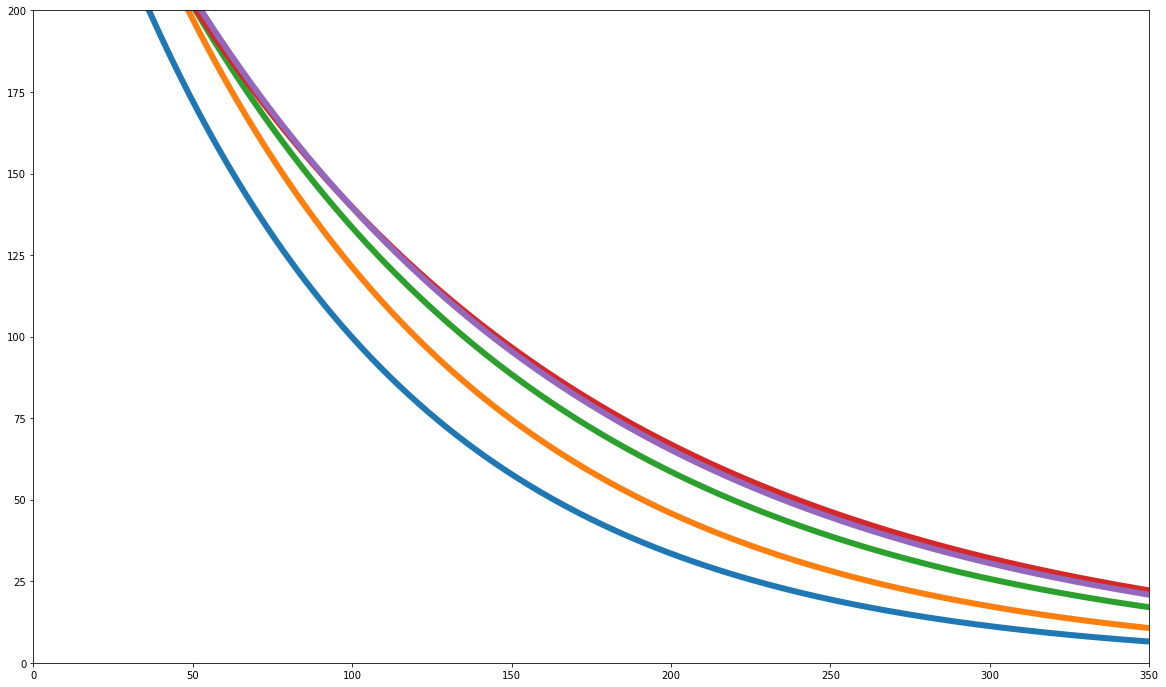

In [106]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.xlim(0, 350)
plt.ylim(0, 200)

ax.plot(r, func_exp([297.2085231640172, -0.010916513517494267], r), linewidth=6)
ax.plot(r, func_exp([320.99493697147204, -0.009732001494027526], r), linewidth=6)
ax.plot(r, func_exp([304.10502690882515, -0.008235434093105216], r), linewidth=6)
ax.plot(r, func_exp([291.55305142597416, -0.007358043437038975], r), linewidth=6)
ax.plot(r, func_exp([298.50374052375736, -0.007600281124918739], r), linewidth=6)

plt.show()